In [1]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data
data = pd.read_csv('C:/Users/PC/projet-git/projet-git/data_train_diabetes_health_indicators.csv')
data['Diabetes_012'] = data['Diabetes_012'].astype(int)
X = data.drop(columns=['Diabetes_012'])
y = data['Diabetes_012']
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
data.head()
print(data.shape)
data.describe()

(47276, 23)


,Unnamed: 0,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,...,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000,47276.000000
mean,118671.500613,0.305800,0.419325,0.401980,0.964337,28.939081,0.408114,0.038265,0.085752,0.781284,...,0.962899,0.062696,2.473560,3.929245,3.761126,0.152720,0.476986,7.887829,5.142482,6.931191
std,68125.928125,0.703757,0.493454,0.490303,0.185450,6.562661,0.491490,0.191837,0.280000,0.413380,...,0.189012,0.242417,1.027017,7.861948,8.239428,0.359721,0.499475,3.227736,0.945945,2.376979
min,4.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,59910.750000,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,5.000000
50%,118660.500000,0.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,177744.250000,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,3.000000,4.000000,2.000000,0.000000,1.000000,10.000000,6.000000,9.000000
max,236377.000000,2.000000,1.000000,1.000000,1.000000,95.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


In [3]:
# Vérification des données manquantes
missing_values = data.isnull().sum()
print("Données manquantes par colonne :\n", missing_values)

# Identification des doublons
duplicate_rows = data[data.duplicated()]
print("Nombre de lignes en double :\n", len(duplicate_rows))

# Vérification du nombre de classes (exemple avec la variable 'Diabetes_012')
classes_count = data['Diabetes_012'].value_counts()
print("Nombre de classes dans 'Diabetes_012' :\n", classes_count)

Données manquantes par colonne :
 Unnamed: 0              0
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
Nombre de lignes en double :
 0
Nombre de classes dans 'Diabetes_012' :
 Diabetes_012
0    39508
2     6689
1     1079
Name: count, dtype: int64


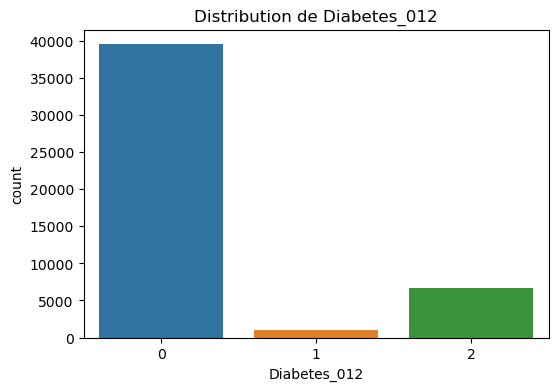

Diabetes_012
0    83.568830
2    14.148828
1     2.282342
Name: proportion, dtype: float64


In [4]:
# Analyse de la variable cible
plt.figure(figsize=(6, 4))
sns.countplot(x='Diabetes_012', data=data)
plt.title('Distribution de Diabetes_012')
plt.show()
percentage_distribution = data['Diabetes_012'].value_counts(normalize=True) * 100
print(percentage_distribution)

In [5]:
data = data.drop(columns=['Unnamed: 0'])

In [6]:
from imblearn.over_sampling import SMOTE
# Sélection des caractéristiques et de la variable cible
X = data.drop(['Diabetes_012'], axis=1)
y = data['Diabetes_012']  # Correction ici

# Apply SMOTE
smote = SMOTE ()
x_smote, y_smote = smote.fit_resample (X, y)
# Checking the class distribution after SMOTE
print("Class distribution after applying SMOTE: In", y_smote.value_counts ())

Class distribution after applying SMOTE: In Diabetes_012
2    39508
0    39508
1    39508
Name: count, dtype: int64


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Séparation en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)  # Corrections ici

# Normalisation des caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

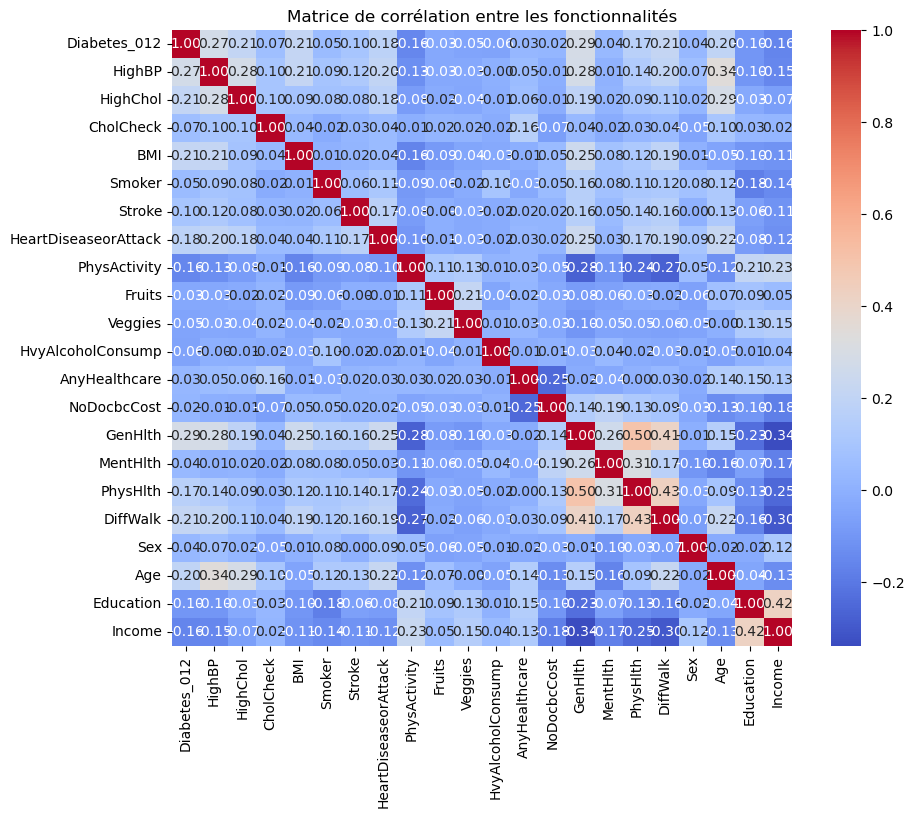

In [9]:
# Corrélations entre les fonctionnalités
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation entre les fonctionnalités')
plt.show()

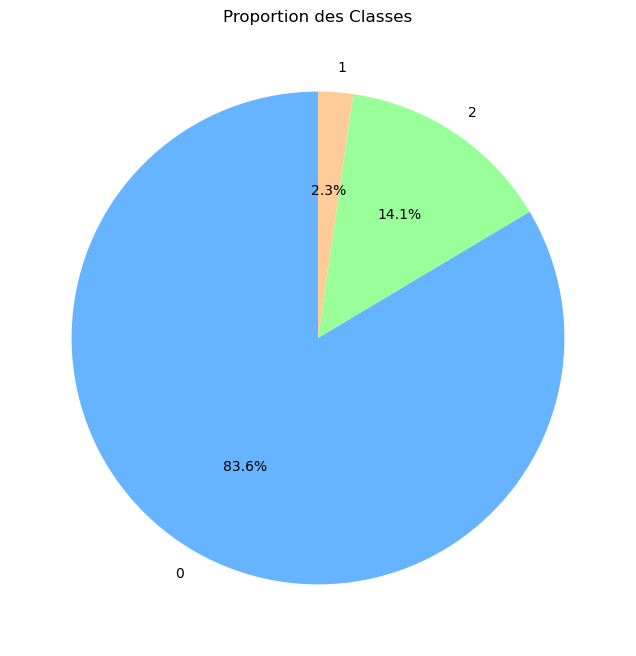

In [12]:
'''y_smote =data['Diabetes_012']
counts = y_smote.value_counts()
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Proportion des Classes')
plt.show()'''

In [11]:
# Initialiser le modèle Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42) 

# Entraîner le modèle sur l'ensemble d'entraînement
random_forest.fit(X_train_scaled, y_train)

# Faire des prédictions sur l'ensemble de test
predictions = random_forest.predict(X_test_scaled)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy du modèle : {accuracy:.2f}')

# Afficher le rapport de classification
print(classification_report(y_test, predictions))

Accuracy du modèle : 0.93
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      8052
           1       0.99      0.97      0.98      7921
           2       0.93      0.88      0.90      7732

    accuracy                           0.93     23705
   macro avg       0.93      0.93      0.93     23705
weighted avg       0.93      0.93      0.93     23705



In [ ]:
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres que vous souhaitez rechercher
param_grid = {
    'n_estimators': [50, 100, 200],  # Nombre d'arbres dans la forêt
    'max_depth': [None, 10, 20, 30],  # Profondeur maximale de chaque arbre
    # Ajoutez d'autres hyperparamètres que vous souhaitez ajuster
}

# Initialiser le modèle RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)

# Créer l'objet GridSearchCV
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy')

# Exécuter la recherche sur grille pour trouver les meilleurs hyperparamètres
grid_search.fit(X_train_scaled, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres:", grid_search.best_params_)

# Utiliser le meilleur modèle pour faire des prédictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_scaled)

# Évaluer les performances du meilleur modèle
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy du meilleur modèle : {accuracy:.2f}')

# Afficher le rapport de classification du meilleur modèle
print(classification_report(y_test, predictions))